[10, 10, 200, 240]
Present Shape tensor([ 10,  10, 200, 240])
Updated Shape tensor([[ 10,  10, 200, 240]])


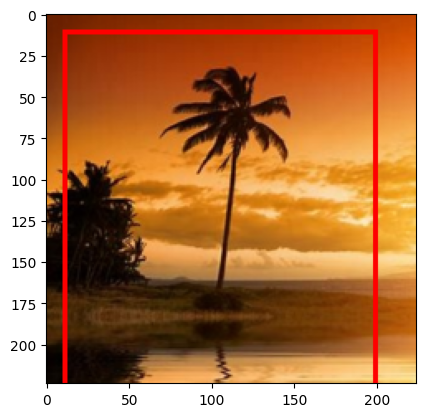

In [ ]:
import torch
from torchvision.transforms import ToTensor, transforms
from PIL import Image
from torchvision.utils import draw_bounding_boxes
import matplotlib.pyplot as plt

bbox = [10, 10, 200, 240]
#image = Image.open("eight.png").convert("L")
#image = Image.open('eight.png')
image = Image.open('tree.jpeg')
# Convert bbox into tensors
print(bbox)
bbox_tensor = torch.tensor(bbox)
print("Present Shape", bbox_tensor)
# Add a new batch dimension
bbox_tensor = bbox_tensor.unsqueeze(0)
print("Updated Shape", bbox_tensor)

# Resize the image and transform to tensor
transform = transforms.Compose([
  transforms.Resize(224),
  transforms.PILToTensor()
])

# Apply transform to image
image_tensor = transform(image)
#torch.set_printoptions(threshold=torch.inf, linewidth=300)
#print(image_tensor)
# Import draw_boundin


# Define the bounding box coordinates
#bbox = [x_min, y_min, x_max, y_max]
bbox_tensor = torch.tensor(bbox).unsqueeze(0)

# Implement draw_bounding_boxes
img_bbox = draw_bounding_boxes(image_tensor, bbox_tensor, width=3, colors="red")

# Tranform tensors to image
transform = transforms.Compose([
    transforms.ToPILImage()
    
])
plt.imshow(transform(img_bbox))
plt.show()

Bounding Box: [10, 10, 220, 200]


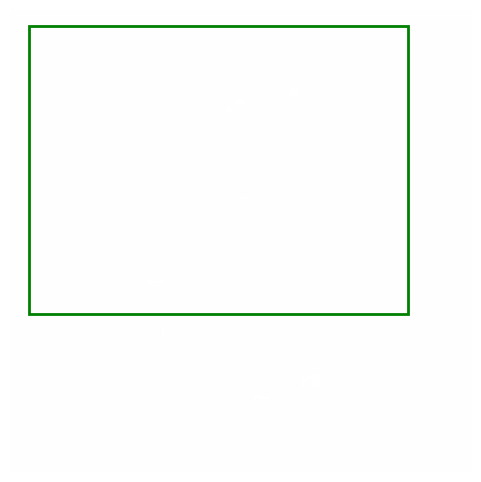

In [22]:
import torch
from torchvision.transforms import ToTensor, transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the bounding box
bbox = [10, 10, 220, 200]

# Load the image
image = Image.open('eight.png')

# Convert bbox into tensors
print("Bounding Box:", bbox)
bbox_tensor = torch.tensor(bbox)

# Add a new batch dimension
bbox_tensor = bbox_tensor.unsqueeze(0)

# Resize the image and transform to tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to 224x224
    transforms.PILToTensor()
])

# Apply transform to image
image_tensor = transform(image)

# Convert the image tensor back to a NumPy array for visualization
image_np = image_tensor.permute(1, 2, 0).numpy()  # Rearrange dimensions to HWC
image_np = (image_np * 255).astype('uint8')  # Scale back to [0, 255]

# Adjust bounding box coordinates to match resized dimensions
original_width, original_height = image.size
resize_width, resize_height = 224, 224
scale_x = resize_width / original_width
scale_y = resize_height / original_height

bbox_resized = [
    bbox[0] * scale_x,
    bbox[1] * scale_y,
    bbox[2] * scale_x,
    bbox[3] * scale_y
]

# Visualize the image with the bounding box
fig, ax = plt.subplots(1, figsize=(6, 6))
ax.imshow(image_np)
rect = patches.Rectangle(
    (bbox_resized[0], bbox_resized[1]),  # Top-left corner
    bbox_resized[2] - bbox_resized[0],  # Width
    bbox_resized[3] - bbox_resized[1],  # Height
    linewidth=2,
    edgecolor='green',
    facecolor='none'
)
ax.add_patch(rect)
plt.axis('off')
plt.show()
